<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-03-19 11:27:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  70.4MB/s    in 2.2s    

2025-03-19 11:27:38 (70.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data


In [4]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [6]:
#find missing values
print(df['ConvertedCompYearly'].isnull().sum())
print(df['Age'].isnull().sum())

42002
0


/tmp/ipykernel_3607/4005048659.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Age'] = df_copy['Age'].replace(age_mapping)


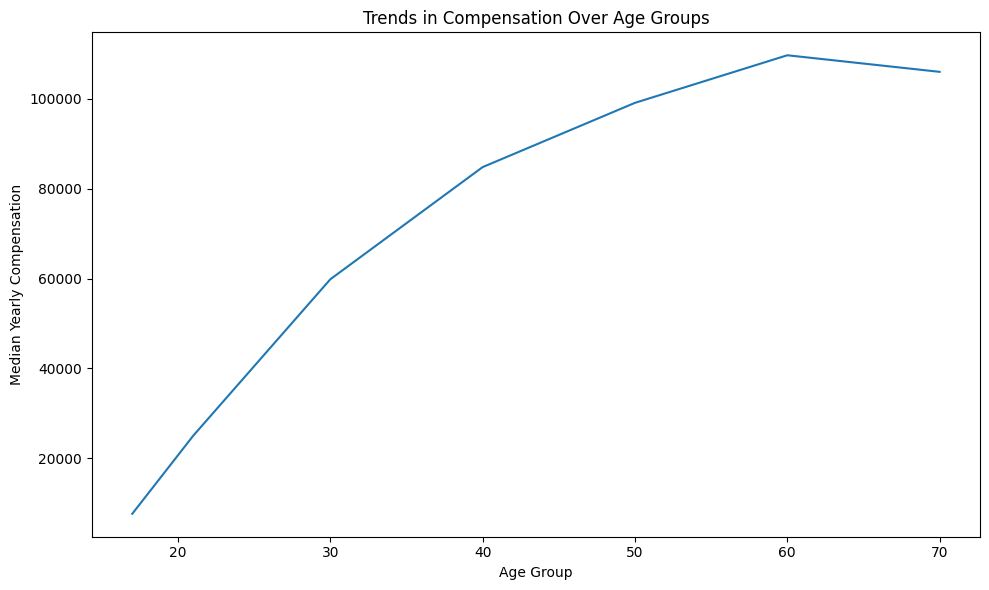

In [7]:
#create a new df
df_copy =df.copy()
#mapping the Age 
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None 
}

#replace age 
df_copy['Age'] = df_copy['Age'].replace(age_mapping)

#drop missing values in ConvertedCompYearly
df_cleaned = df_copy.dropna(subset=['ConvertedCompYearly'])

#group by 'Age' and calculate the median of 'ConvertedCompYearly'
age_median = df_cleaned.groupby('Age')['ConvertedCompYearly'].median().reset_index()

#create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=age_median, x='Age', y='ConvertedCompYearly')  
plt.title('Trends in Compensation Over Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')

plt.tight_layout()
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


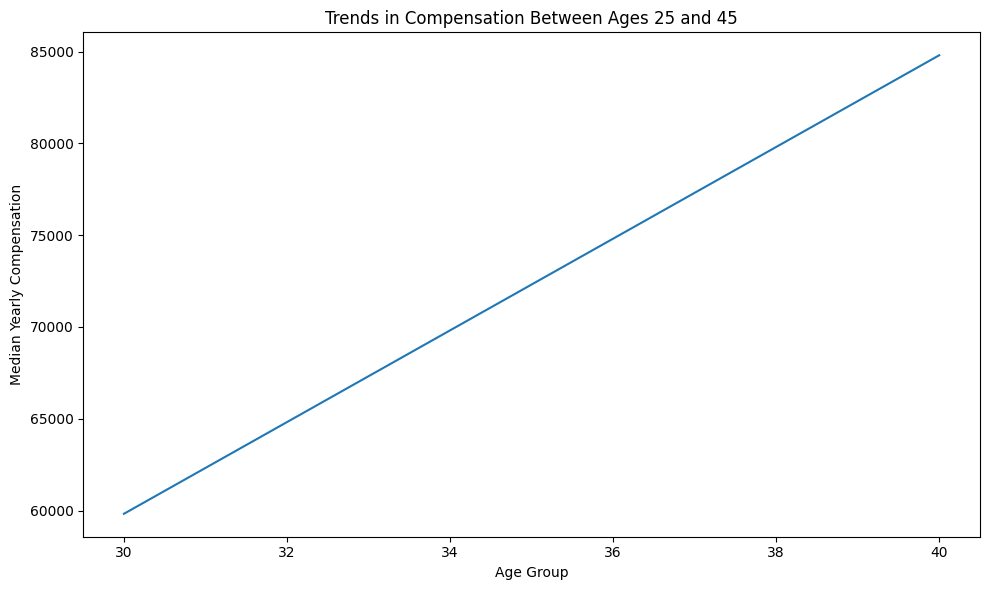

In [8]:
#new df filtering for age between 25 and 45
df_25_45 = age_median[(age_median['Age'] >= 25) & (age_median['Age'] <= 45)]

#create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_25_45, x='Age', y='ConvertedCompYearly')
plt.title('Trends in Compensation Between Ages 25 and 45')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')

plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [9]:
#find missing values
print(df['JobSatPoints_6'].isnull().sum())
print(df['WorkExp'].isnull().sum())
df['WorkExp'].unique()

35987
35779


array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

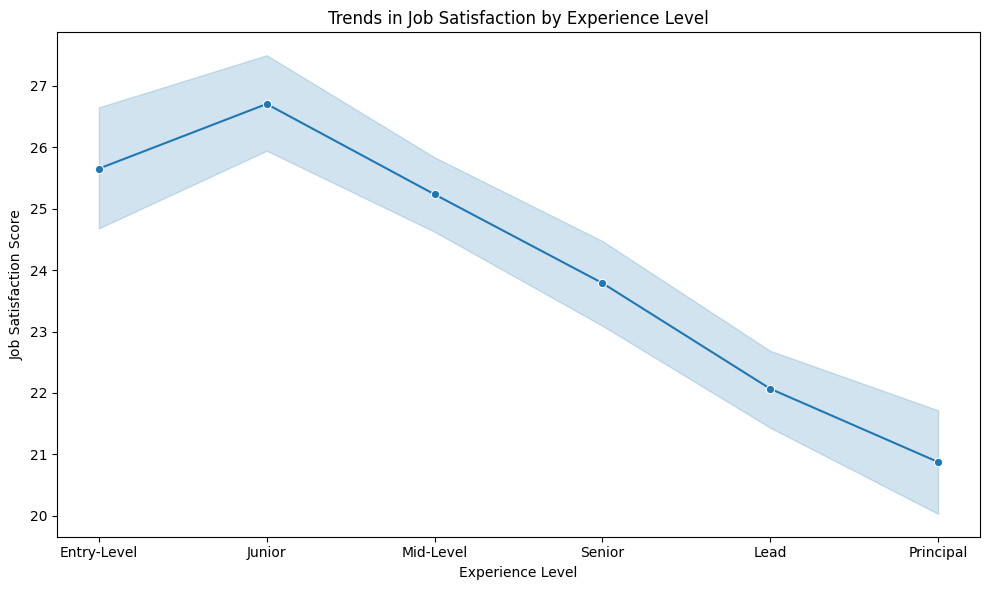

In [10]:
# Create a new df to work with
df_new = df.copy()

# Drop missing values for JobSatPoints_6 and WorkExp
df_new = df_new.dropna(subset=['JobSatPoints_6', 'WorkExp'])

# Mapping the experience level based on WorkExp
experience_mapping = {
    (0, 2): 'Entry-Level',
    (3, 5): 'Junior',
    (6, 10): 'Mid-Level',
    (11, 15): 'Senior',
    (16, 25): 'Lead',
    (26, float('inf')): 'Principal'
}

# Function to map WorkExp to experience level
def map_experience_level(work_exp):
    for (lower, upper), level in experience_mapping.items():
        if lower <= work_exp <= upper:
            return level
    return 'Unknown'  # In case the value doesn't fall in the expected ranges

# Apply the function to create a new ExperienceLevel column
df_new['ExpLevel'] = df_new['WorkExp'].apply(map_experience_level)

# Order the DataFrame based on the predefined experience levels
experience_order = ['Entry-Level', 'Junior', 'Mid-Level', 'Senior', 'Lead', 'Principal']
df_new['ExpLevel'] = pd.Categorical(df_new['ExpLevel'], categories=experience_order, ordered=True)

# Create the plot
plt.figure(figsize=(10,6)) 
sns.lineplot(data=df_new, x='ExpLevel', y='JobSatPoints_6', marker='o')
plt.title('Trends in Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Satisfaction Score')

plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


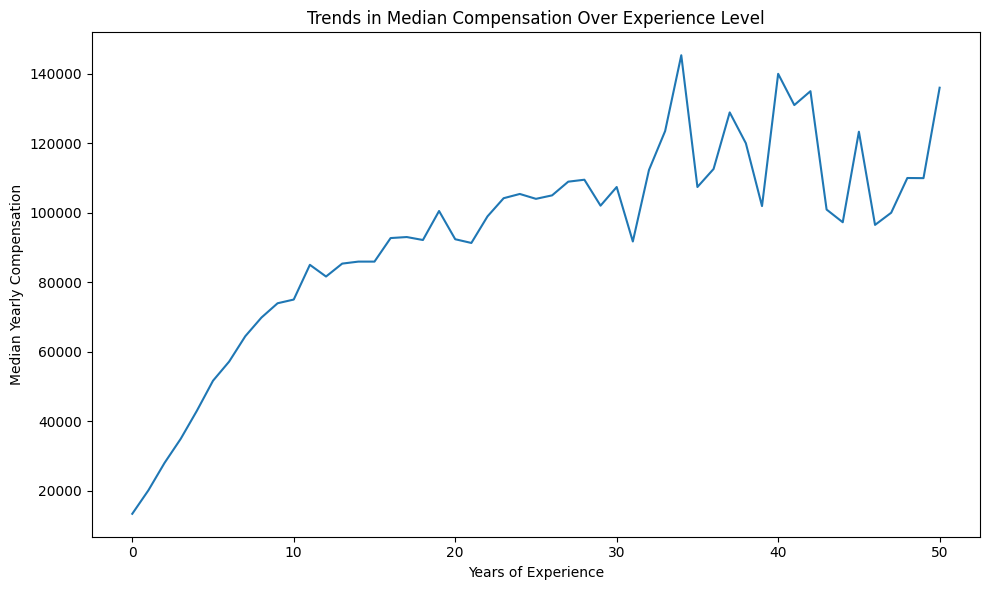

In [11]:
#drop missing values
df_conv_exp = df.dropna(subset=['WorkExp', 'ConvertedCompYearly']) 
#calculate the median compensation
conv_exp_median = df_conv_exp.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

#create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=conv_exp_median, x='WorkExp', y='ConvertedCompYearly')
plt.title('Trends in Median Compensation Over Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Median Yearly Compensation')

plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


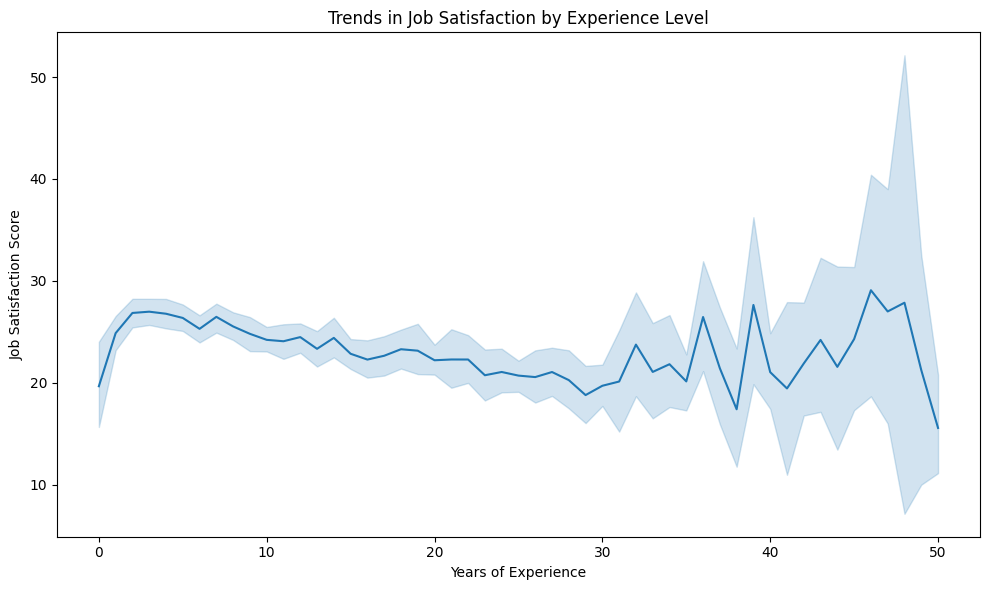

In [12]:
#drop missing values
df_sat_exp = df.dropna(subset=['JobSatPoints_6', 'WorkExp'])

#create the plot
plt.figure(figsize=(10,6)) 
sns.lineplot(data=df_sat_exp, x ='WorkExp', y = 'JobSatPoints_6')
plt.title('Trends in Job Satisfaction by Experience Level')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction Score')

plt.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
